In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
ack_present = pd.read_csv('../parsed_data/cleaned_data/PMC_full_text_ack_present.csv')

ack_absent = pd.read_csv('../parsed_data/cleaned_data/PMC_full_text_ack_absent.csv')

In [2]:
C = pd.read_csv('Ack_present_Mesh_Counts.csv', index_col=0)

C2 = pd.read_csv('Ack_absent_Mesh_Counts.csv', index_col=0)

print(C)

                                                          0
Ability                                               65346
Case Study                                             7201
Child                                                 62974
Child Abuse                                             478
Communication                                         16505
Criminal Law                                             58
Critique                                                312
Deception                                               266
Family                                                63074
History, 20th Century                                  1120
Humans                                               503214
Knowledge                                             52359
Life Style                                            10337
Movement                                              17181
Organizations                                         17764
Pain                                    

In [9]:
ack_present.head()

NameError: name 'ack_present' is not defined

In [ ]:
import collections

from tqdm import tqdm

key = 'MeSH Extracted'

C = collections.Counter()

for k,row in tqdm(ack_present.iterrows(), total=len(ack_present)):
    if type(row[key]) ==float: continue
    keywords = (row[key].split(";"))
    C.update(keywords)
C["_total_documents"] = len(ack_present)
C = pd.DataFrame.from_dict(C,orient='index')
 
C.to_csv('Ack_present_Mesh_Counts.csv', index=True)    
    
    
print(C)

    

In [ ]:
C2 = collections.Counter()

for k,row in tqdm(ack_absent.iterrows(), total=len(ack_absent)):
    if type(row[key]) == float: continue
    keywords = (row[key].split(";"))
    C2.update(keywords)
C2["_total_documents"] = len(ack_absent)
C2 = pd.DataFrame.from_dict(C2,orient='index')


C2.to_csv('Ack_absent_Mesh_Counts.csv', index=True)  
print(C2)

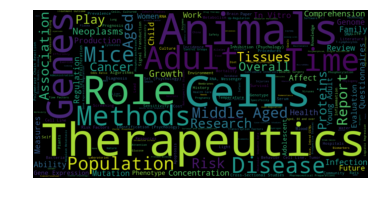

In [4]:
C_modified = C.drop({'_total_documents', 'Humans', 'Patients', 'Male', 'Female'}, axis=0)


C_dict = C_modified.to_dict()

#print(C_dict['0'])

wordcloud = WordCloud(width=1000, height=500)
# Display the generated image:
# the matplotlib way:

wordcloud = wordcloud.generate_from_frequencies(frequencies=C_dict['0'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

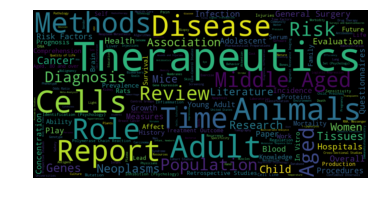

In [10]:
#print(C2)
C2_modified = C2.drop({'_total_documents', 'Humans', 'Patients', 'Male', 'Female'}, axis=0)


C2_dict = C2_modified.to_dict()

#print(C2_dict)

wordcloud = WordCloud(width=1000, height=500)
# Display the generated image:
# the matplotlib way:

wordcloud = wordcloud.generate_from_frequencies(frequencies=C2_dict['0'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [24]:
#print(C_modified)
#Find the relative frequencies of each word compared to the overall corpus
C_percent = C_modified/C_modified['0'].sum()

C2_percent = C2_modified/C2_modified['0'].sum()


#Compare the ack present versus ack absent
diff_ack_present = (C_percent - C2_percent).dropna()

diff_ack_absent = -(C_percent - C2_percent).dropna()

diff_ack_present_dict = diff_ack_present.to_dict()

diff_ack_absent_dict = diff_ack_absent.to_dict()


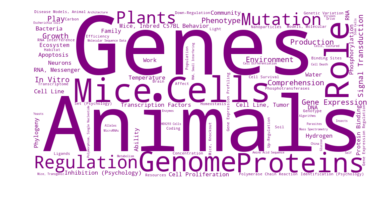

In [31]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=100,color_func=lambda *args, **kwargs: "purple")


wordcloud = wordcloud.generate_from_frequencies(frequencies=diff_ack_present_dict['0'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


wordcloud.to_file('../figures/Ack_present_wordcloud.png')

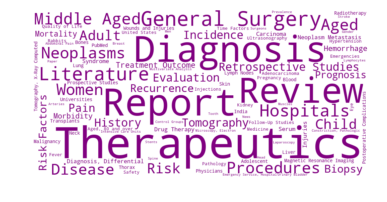

In [30]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=100,color_func=lambda *args, **kwargs: "purple")


wordcloud = wordcloud.generate_from_frequencies(frequencies=diff_ack_absent_dict['0'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file('../figures/Ack_absent_wordcloud.png')